In [197]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [67]:
df = pd.read_csv('HumanR_data.csv')

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

In [69]:
df.shape

(311, 36)

# Process the dates

In [70]:
df[ 'DOB_year' ] = pd.to_datetime( df[ 'DOB' ] ).dt.year
df[[ 'DOB_year' ]]

,DOB_year
0,1983
1,1975
2,1988
3,1988
4,1989
...,...
306,1985
307,1982
308,1979
309,1979


In [72]:
DateofHire_date = pd.to_datetime( df[ 'DateofHire' ] )
df[ 'DateofHire_year' ] = DateofHire_date.dt.year
df[ 'DateofHire_month' ] =  DateofHire_date.dt.month

df[[ 'DateofHire_year', 'DateofHire_month' ]]

,DateofHire_year,DateofHire_month
0,2011,7
1,2015,3
2,2011,7
3,2008,1
4,2011,7
...,...,...
306,2014,7
307,2008,9
308,2010,4
309,2015,3


In [73]:
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences,DOB_year,DateofHire_year,DateofHire_month
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Exceeds,4.60,5,0,1/17/2019,0,1,1983,2011,7
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Fully Meets,4.96,3,6,2/24/2016,0,17,1975,2015,3
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Fully Meets,3.02,3,0,5/15/2012,0,3,1988,2011,7
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Fully Meets,4.84,5,0,1/3/2019,0,15,1988,2008,1
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Fully Meets,5.00,4,0,2/1/2016,0,2,1989,2011,7


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

In [158]:
clean_df = df.drop( columns=['Salary', 'Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'EmpStatusID', 'DeptID', 'PositionID', 'Zip', 'Sex', 'HispanicLatino', 'Termd', 'DateofTermination', 'TermReason', 'EmploymentStatus', 'ManagerID', 'PerformanceScore', 'LastPerformanceReview_Date', 'RecruitmentSource', 'DOB', 'DateofHire', 'Position', 'State', 'MaritalDesc', 'CitizenDesc', 'RaceDesc', 'Department', 'ManagerName'  ] )
clean_df

,GenderID,PerfScoreID,FromDiversityJobFairID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences,DOB_year,DateofHire_year,DateofHire_month
0,1,4,0,4.60,5,0,0,1,1983,2011,7
1,1,3,0,4.96,3,6,0,17,1975,2015,3
2,0,3,0,3.02,3,0,0,3,1988,2011,7
3,0,3,0,4.84,5,0,0,15,1988,2008,1
4,0,3,0,5.00,4,0,0,2,1989,2011,7
...,...,...,...,...,...,...,...,...,...,...,...
306,1,3,0,4.07,4,0,0,13,1985,2014,7
307,0,1,0,3.20,2,0,5,4,1982,2008,9
308,0,4,0,4.60,5,6,0,16,1979,2010,4
309,0,3,0,5.00,3,5,0,11,1979,2015,3


In [159]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   GenderID                311 non-null    int64  
 1   PerfScoreID             311 non-null    int64  
 2   FromDiversityJobFairID  311 non-null    int64  
 3   EngagementSurvey        311 non-null    float64
 4   EmpSatisfaction         311 non-null    int64  
 5   SpecialProjectsCount    311 non-null    int64  
 6   DaysLateLast30          311 non-null    int64  
 7   Absences                311 non-null    int64  
 8   DOB_year                311 non-null    int64  
 9   DateofHire_year         311 non-null    int64  
 10  DateofHire_month        311 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 26.9 KB


In [160]:
encoder = OneHotEncoder()
encoder.fit_transform( df[[ 'Position', 'State', 'MaritalDesc', 'CitizenDesc', 'RaceDesc', 'Department', 'ManagerName' ]] )
print( encoder.categories_ )

feature_arr = encoder.fit_transform( df[[ 'Position', 'State', 'MaritalDesc', 'CitizenDesc', 'RaceDesc', 'Department', 'ManagerName' ]] ).toarray()
feature_labels = encoder.categories_

[array(['Accountant I', 'Administrative Assistant', 'Area Sales Manager',
       'BI Developer', 'BI Director', 'CIO', 'Data Analyst',
       'Data Analyst ', 'Data Architect', 'Database Administrator',
       'Director of Operations', 'Director of Sales',
       'Enterprise Architect', 'IT Director', 'IT Manager - DB',
       'IT Manager - Infra', 'IT Manager - Support', 'IT Support',
       'Network Engineer', 'President & CEO', 'Principal Data Architect',
       'Production Manager', 'Production Technician I',
       'Production Technician II', 'Sales Manager', 'Senior BI Developer',
       'Shared Services Manager', 'Software Engineer',
       'Software Engineering Manager', 'Sr. Accountant', 'Sr. DBA',
       'Sr. Network Engineer'], dtype=object), array(['AL', 'AZ', 'CA', 'CO', 'CT', 'FL', 'GA', 'ID', 'IN', 'KY', 'MA',
       'ME', 'MT', 'NC', 'ND', 'NH', 'NV', 'NY', 'OH', 'OR', 'PA', 'RI',
       'TN', 'TX', 'UT', 'VA', 'VT', 'WA'], dtype=object), array(['Divorced', 'Married', '

In [161]:
feature_labels = [ item for row in feature_labels for item in row ]

In [162]:
features = pd.DataFrame( feature_arr, columns=feature_labels )

In [166]:
ready_df = pd.concat([ clean_df, features ], axis=1 )
ready_df

,GenderID,PerfScoreID,FromDiversityJobFairID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences,DOB_year,DateofHire_year,...,Jennifer Zamora,John Smith,Kelley Spirea,Ketsia Liebig,Kissy Sullivan,Lynn Daneault,Michael Albert,Peter Monroe,Simon Roup,Webster Butler
0,1,4,0,4.60,5,0,0,1,1983,2011,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1,3,0,4.96,3,6,0,17,1975,2015,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,3,0,3.02,3,0,0,3,1988,2011,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0,3,0,4.84,5,0,0,15,1988,2008,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,3,0,5.00,4,0,0,2,1989,2011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,1,3,0,4.07,4,0,0,13,1985,2014,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
307,0,1,0,3.20,2,0,5,4,1982,2008,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
308,0,4,0,4.60,5,6,0,16,1979,2010,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
309,0,3,0,5.00,3,5,0,11,1979,2015,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [181]:
scaled_df = StandardScaler().fit_transform( ready_df )
scaled_df

array([[ 1.14179845,  1.74451625, -0.3206819 , ..., -0.21711298,
        -0.2404644 , -0.26909811],
       [ 1.14179845,  0.0384013 , -0.3206819 , ..., -0.21711298,
         4.15861968, -0.26909811],
       [-0.87581131,  0.0384013 , -0.3206819 , ..., -0.21711298,
        -0.2404644 , -0.26909811],
       ...,
       [-0.87581131,  1.74451625, -0.3206819 , ..., -0.21711298,
        -0.2404644 , -0.26909811],
       [-0.87581131,  0.0384013 , -0.3206819 , ..., -0.21711298,
         4.15861968, -0.26909811],
       [-0.87581131,  0.0384013 , -0.3206819 , ..., -0.21711298,
        -0.2404644 , -0.26909811]])

In [183]:
y = np.asanyarray( df[[ 'Salary' ]] )

In [198]:
xtrain, xtest, ytrain, ytest = train_test_split(ready_df, y, test_size=0.25)

In [200]:
train_model = LinearRegression()
train_model.fit( xtrain, ytrain )
print( 'Train R2-score:', train_model.score( xtrain, ytrain ) )

Train R2-score: 0.9630242621314885


In [203]:
test_model = LinearRegression()
test_model.fit( xtest, ytest )
print( 'Test R2-score:', test_model.score( xtest, ytest ) )

Test R2-score: 0.9708029906269919


                        coef
names                       
MT                  0.000000
NV                  0.000000
OH                  0.000000
OR                  0.000000
PA                  0.000000
...                      ...
ME                  0.036585
Janet King          0.045073
IT Manager - Infra  0.058324
RI                  0.058356
Director of Sales   0.058356

[112 rows x 1 columns]


Text(0.5, 1.0, 'Importance of variables over the salary')

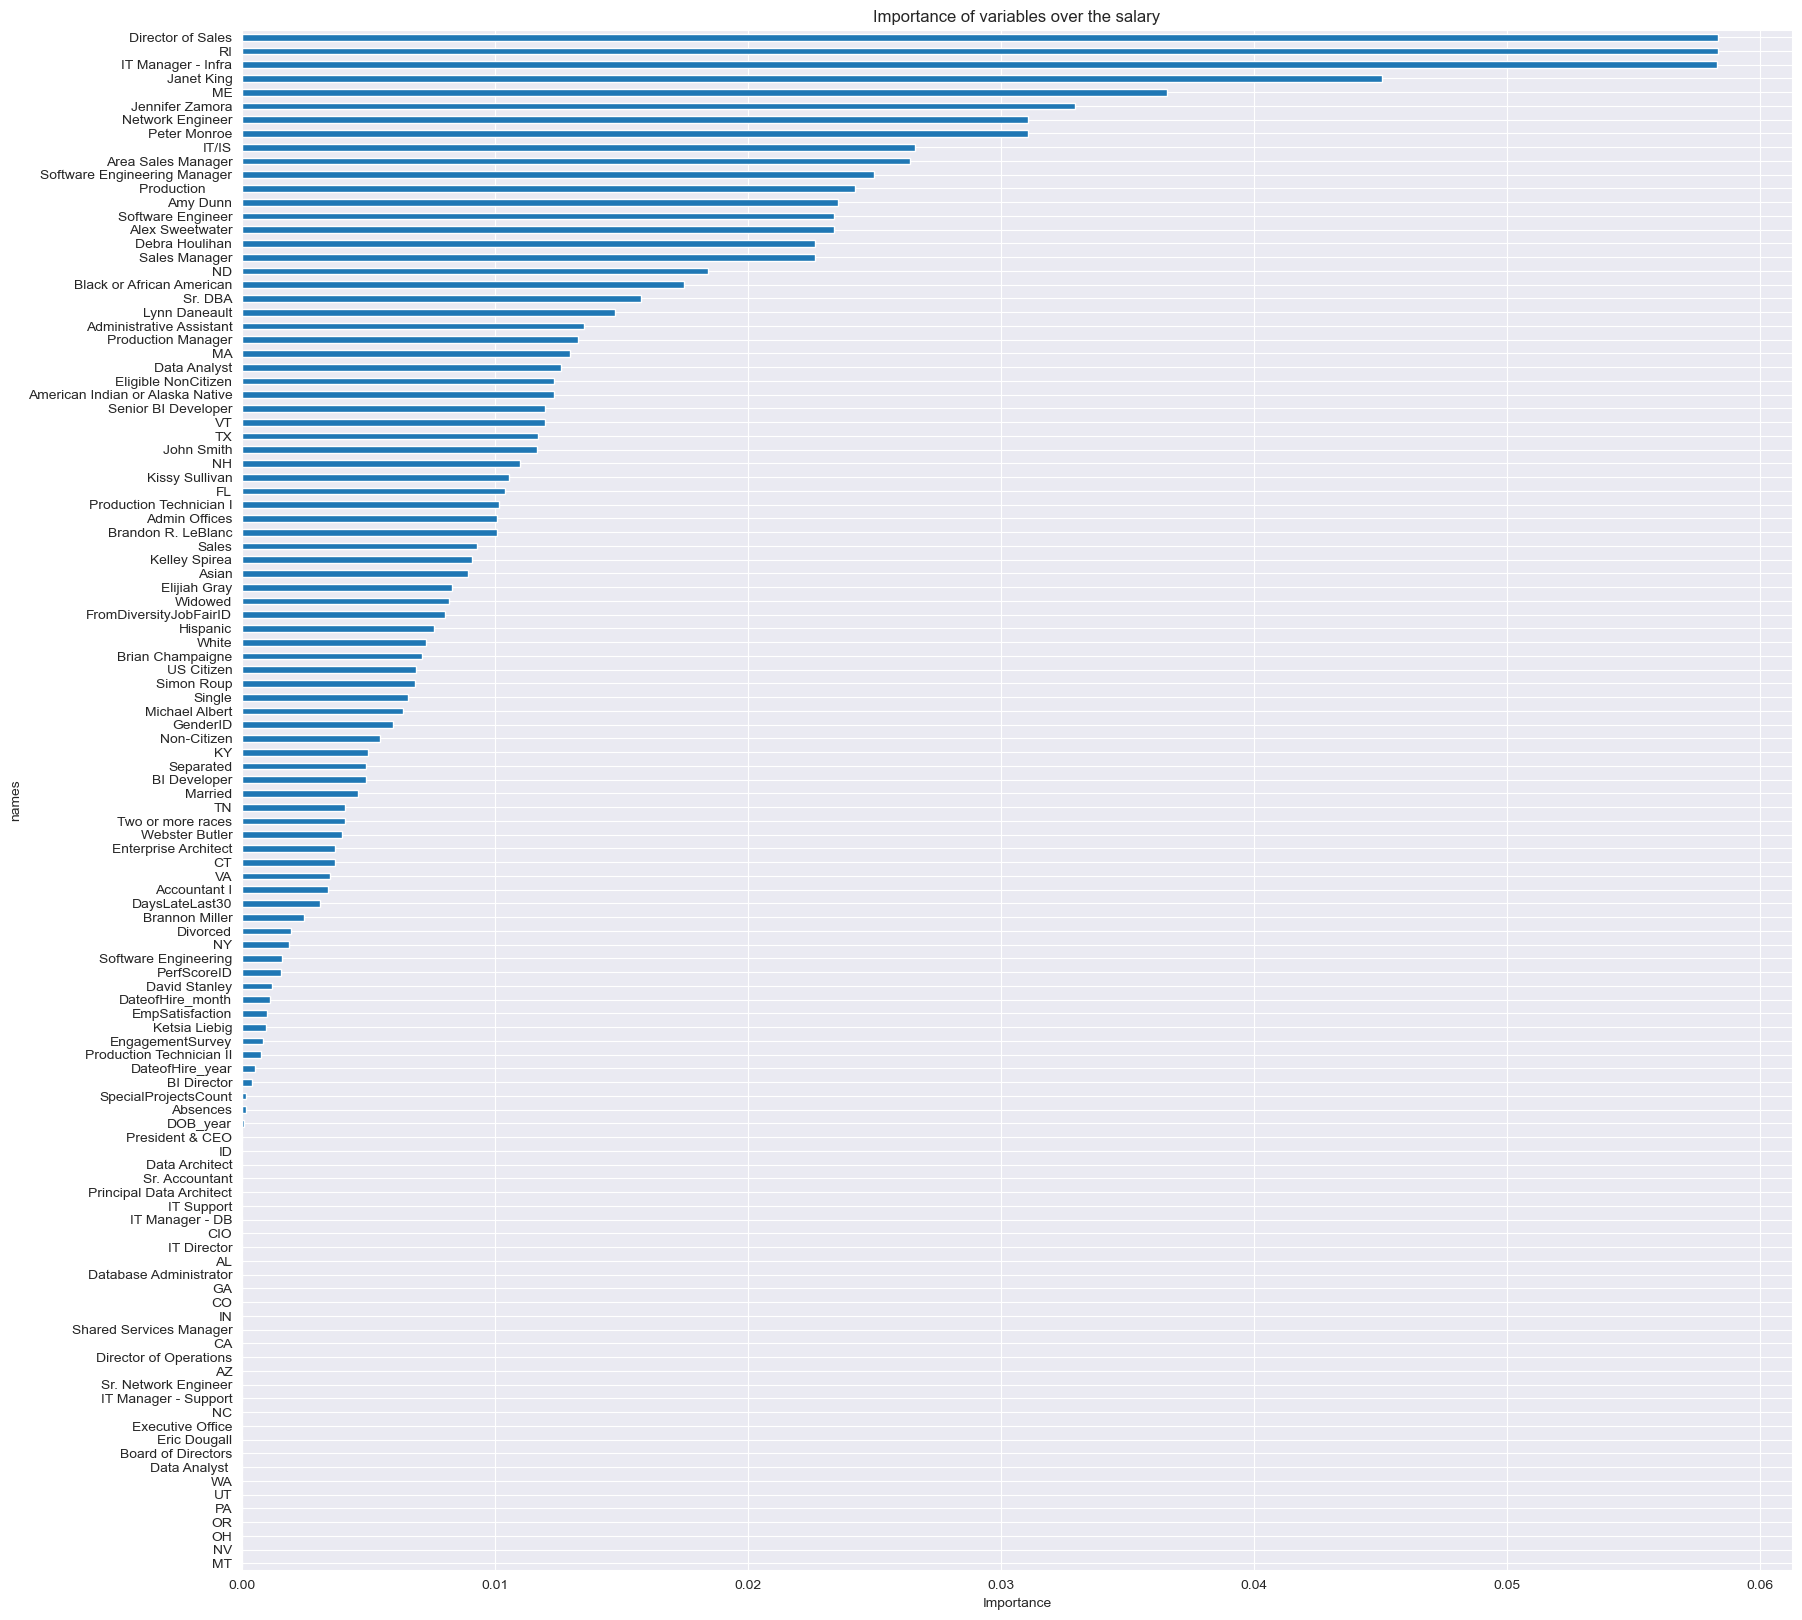

In [210]:
df3 = pd.DataFrame()
coef = np.abs( test_model.coef_.ravel() )
df3[ 'coef' ] = coef / np.sum( coef )
df3['names'] = ready_df.columns
df3.sort_values( by=[ 'coef' ], ascending=True, inplace=True )
df3.set_index( 'names', inplace=True )
print( df3 )

plt.figure( figsize=( 20, 20 ) )
df3.coef.plot( kind='barh' )
plt.xlabel( 'Importance' )
plt.title( 'Importance of variables over the salary' )

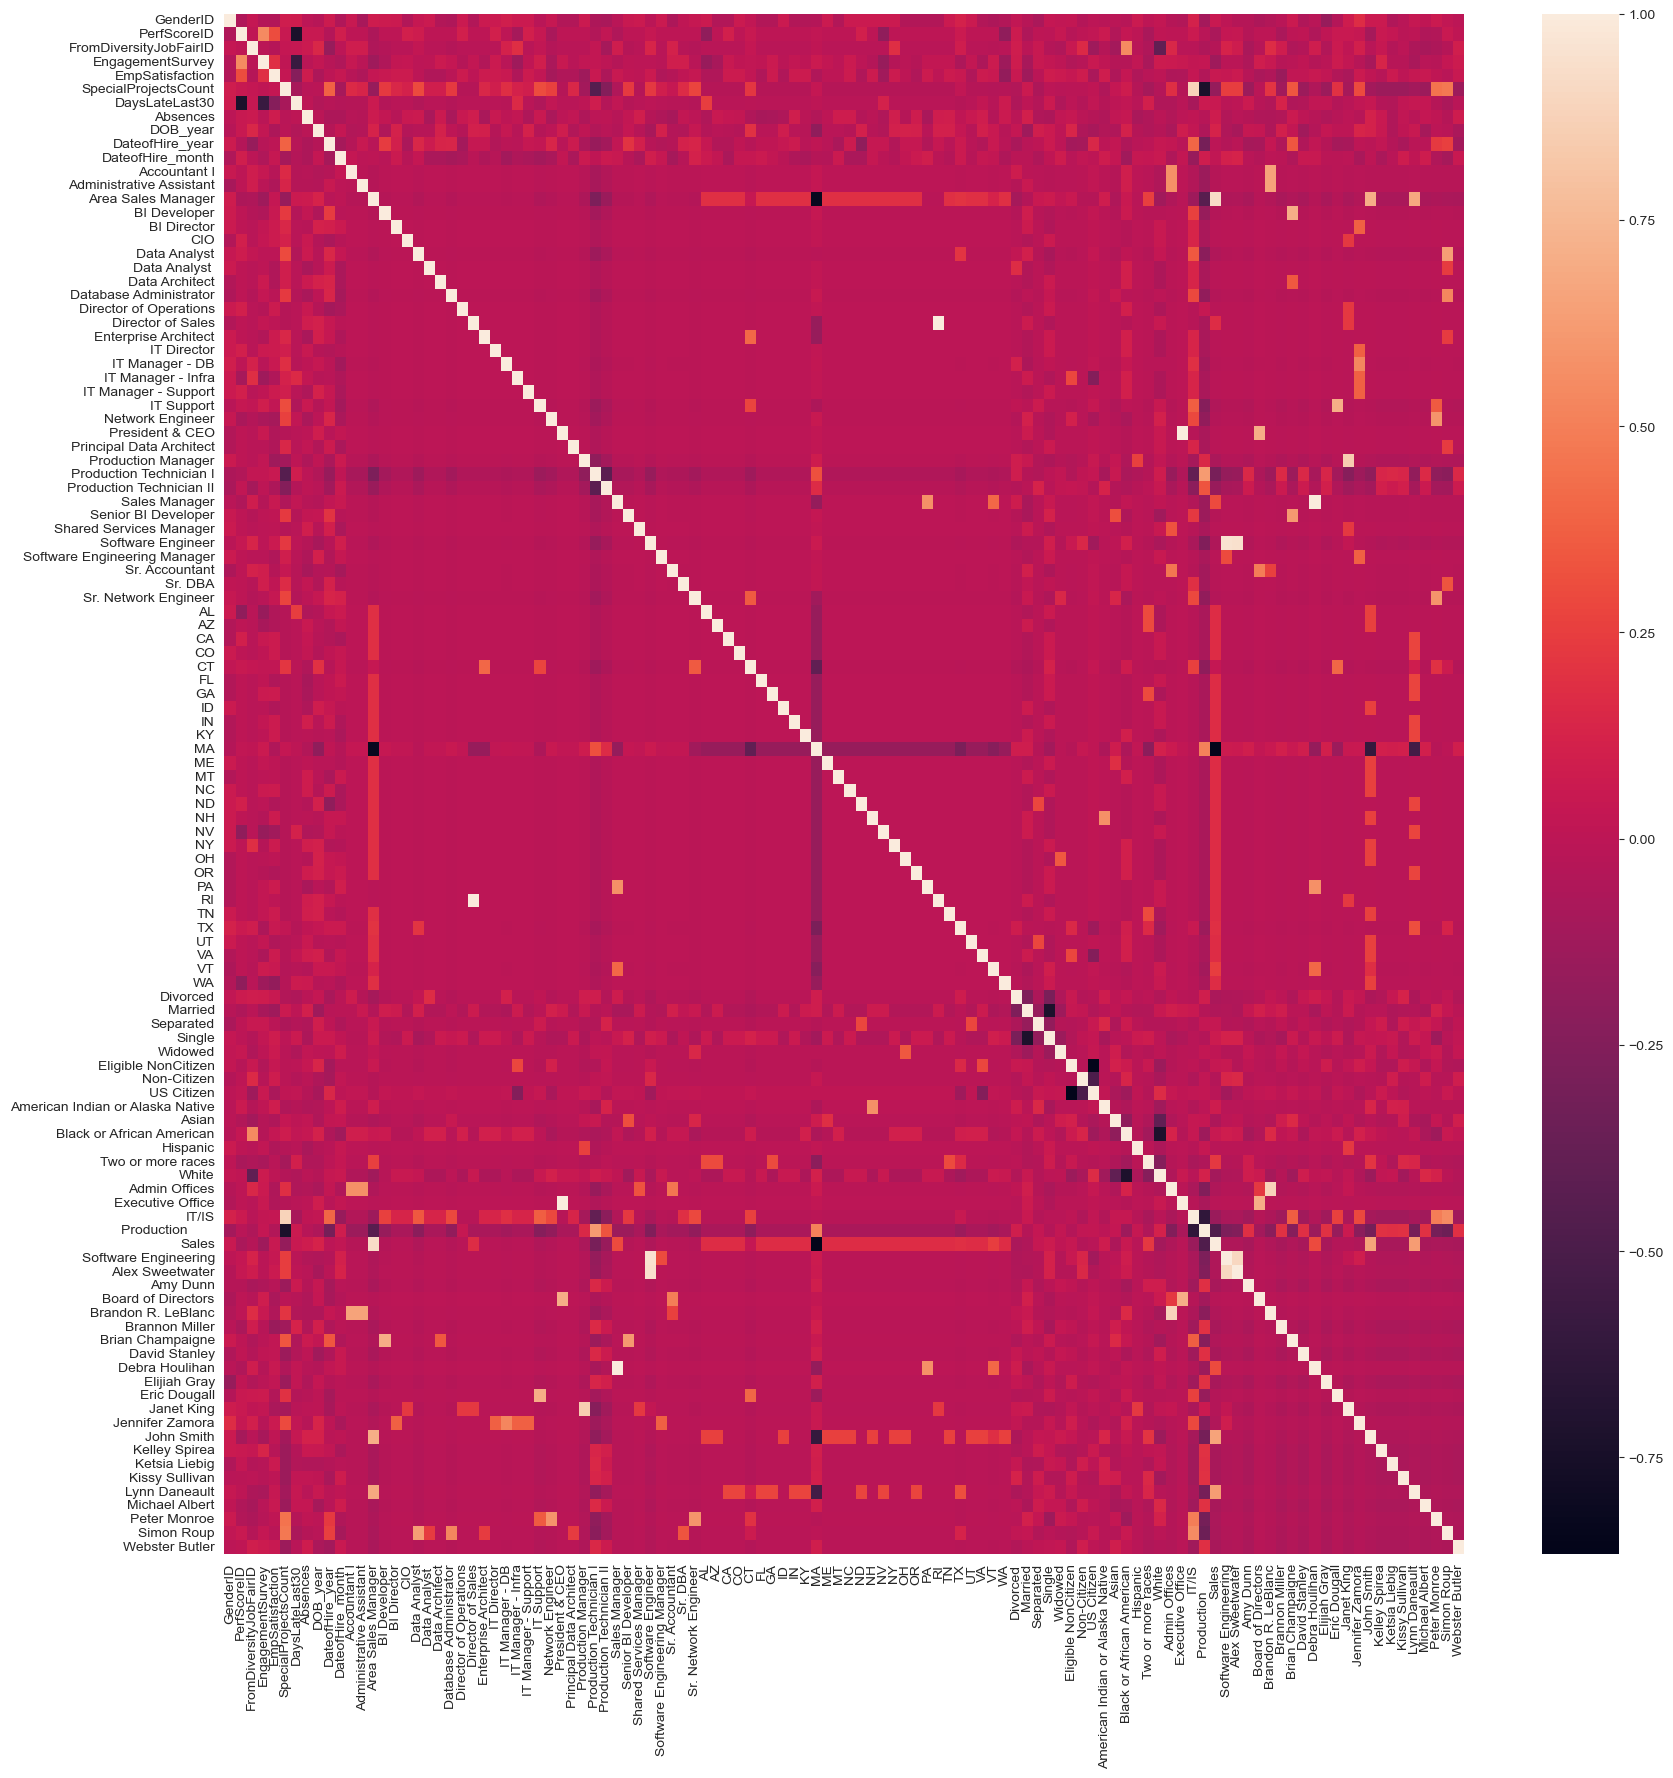

In [211]:
corr = ready_df.corr()
plt.figure( figsize=( 20, 20 ) )
sns.heatmap(
    corr,
    xticklabels=corr.columns,
    yticklabels=corr.columns,
)

plt.show()

In [ ]:
# pd.plotting.scatter_matrix( clean_df )

In [209]:
print( 'Train R2-score:', train_model.score( xtrain, ytrain ) )
print( 'Test R2-score:', test_model.score( xtest, ytest ) )

Train R2-score: 0.9630242621314885
Test R2-score: 0.9708029906269919
